In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [92]:
df = pd.read_csv('tabla_principal_etl.csv')

print("DATASET CARGADO")
print("-"*60)
print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumnas:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

DATASET CARGADO
------------------------------------------------------------
Dimensiones: 110,197 filas × 12 columnas
Memoria: 75.53 MB

Columnas:
    1. order_number
    2. order_id
    3. product_id
    4. price
    5. product_category_name
    6. order_purchase_datetime
    7. orders_status
    8. orders_customer_id
    9. customer_unique_id
   10. customer_state
   11. review_score
   12. payment_type


In [93]:
df.head()

,order_number,order_id,product_id,price,product_category_name,order_purchase_datetime,orders_status,orders_customer_id,customer_unique_id,customer_state,review_score,payment_type
0,26662,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,02-10-2017,delivered,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,4.00,voucher
1,88456,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,24-07-2018,delivered,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,Bahia,4.00,boleto
2,92361,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,159.90,automotivo,08-08-2018,delivered,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,Goias,5.00,credit_card
3,33657,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,pet_shop,18-11-2017,delivered,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,Rio Grande do Norte,5.00,credit_card
4,53505,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,19.90,papelaria,13-02-2018,delivered,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,Sao Paulo,5.00,credit_card


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_number             110197 non-null  int64  
 1   order_id                 110197 non-null  object 
 2   product_id               110197 non-null  object 
 3   price                    110197 non-null  float64
 4   product_category_name    108660 non-null  object 
 5   order_purchase_datetime  110197 non-null  object 
 6   orders_status            110197 non-null  object 
 7   orders_customer_id       110197 non-null  object 
 8   customer_unique_id       110197 non-null  object 
 9   customer_state           110197 non-null  object 
 10  review_score             109370 non-null  float64
 11  payment_type             110194 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 10.1+ MB


In [95]:
print("ANÁLISIS DE VALORES NULOS")
print("-"*60)

nulos = df.isnull().sum()
nulos_pct = (df.isnull().sum() / len(df) * 100).round(2)

nulos_df = pd.DataFrame({
    'Columna': nulos.index,
    'Nulos': nulos.values,
    'Porcentaje': nulos_pct.values
}).sort_values('Nulos', ascending=False)

print("\nColumnas con valores nulos:")
print(nulos_df[nulos_df['Nulos'] > 0].to_string(index=False))

print(f"\nTotal de valores nulos: {df.isnull().sum().sum():,}")

ANÁLISIS DE VALORES NULOS
------------------------------------------------------------

Columnas con valores nulos:
              Columna  Nulos  Porcentaje
product_category_name   1537        1.39
         review_score    827        0.75
         payment_type      3        0.00

Total de valores nulos: 2,367


In [96]:
print("\nTRATANDO NULOS EN product_category_name")
print("-"*60)

nulos_antes = df['product_category_name'].isnull().sum()
print(f"Nulos antes: {nulos_antes:,}")

df['product_category_name'] = df['product_category_name'].fillna('Otros')

nulos_despues = df['product_category_name'].isnull().sum()
print(f"Nulos después: {nulos_despues}")
print("Valores nulos reemplazados por 'Otros'")


TRATANDO NULOS EN product_category_name
------------------------------------------------------------
Nulos antes: 1,537
Nulos después: 0
Valores nulos reemplazados por 'Otros'


In [97]:
print("\nTRATANDO NULOS EN payment_type")
print("-"*60)

nulos_antes = df['payment_type'].isnull().sum()
print(f"Nulos antes: {nulos_antes:,}")

df['payment_type'] = df['payment_type'].dropna()

nulos_despues = df['payment_type'].isnull().sum()
print(f"Nulos después: {nulos_despues}")
print("Valores nulos desechados por tratarse únicamente de 3 registros")


TRATANDO NULOS EN payment_type
------------------------------------------------------------
Nulos antes: 3
Nulos después: 3
Valores nulos desechados por tratarse únicamente de 3 registros


In [98]:
print("\nTRATANDO NULOS EN review_score")
print("-"*60)

nulos_antes = df['review_score'].isnull().sum()
print(f"Nulos antes: {nulos_antes:,}")
print(f"Representan el {nulos_antes/len(df)*100:.2f}% del dataset")

print(f"\nEstadísticas de review_score (sin nulos):")
print(f"   Media: {df['review_score'].mean():.2f}")
print(f"   Mediana: {df['review_score'].median():.2f}")
print(f"   Moda: {df['review_score'].mode()[0]:.0f}")

mediana_review = df['review_score'].median()
df['review_score'] = df['review_score'].fillna(mediana_review)

nulos_despues = df['review_score'].isnull().sum()
print(f"\nNulos después: {nulos_despues}")
print(f"Valores nulos reemplazados por la mediana ({mediana_review:.0f})")


TRATANDO NULOS EN review_score
------------------------------------------------------------
Nulos antes: 827
Representan el 0.75% del dataset

Estadísticas de review_score (sin nulos):
   Media: 4.08
   Mediana: 5.00
   Moda: 5

Nulos después: 0
Valores nulos reemplazados por la mediana (5)


In [99]:
print("\nVERIFICACIÓN FINAL")
print("="*60)

nulos_total = df.isnull().sum().sum()
print(f"Total de valores nulos restantes: {nulos_total}")

if nulos_total == 0:
    print("\n¡Dataset completamente limpio de valores nulos!")
else:
    print("\nAún hay valores nulos:")
    print(df.isnull().sum()[df.isnull().sum() > 0])


VERIFICACIÓN FINAL
Total de valores nulos restantes: 3

Aún hay valores nulos:
payment_type    3
dtype: int64


In [100]:
print("CREANDO VARIABLE DE REGIÓN GEOGRÁFICA")
print("-"*60)

estados_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapa': 'AP', 'Amazonas': 'AM',
    'Bahia': 'BA', 'Ceara': 'CE', 'Distrito Federal': 'DF',
    'Espirito Santo': 'ES', 'Goias': 'GO', 'Maranhao': 'MA',
    'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Para': 'PA', 'Paraiba': 'PB', 'Parana': 'PR', 'Pernambuco': 'PE',
    'Piaui': 'PI', 'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS', 'Rondonia': 'RO', 'Roraima': 'RR',
    'Santa Catarina': 'SC', 'Sao Paulo': 'SP', 'Sergipe': 'SE', 'Tocantins': 'TO'
}

regiones_brasil = {
    # Norte
    'Acre': 'Norte', 'Amazonas': 'Norte', 'Amapa': 'Norte', 'Para': 'Norte',
    'Rondonia': 'Norte', 'Roraima': 'Norte', 'Tocantins': 'Norte',
    # Nordeste
    'Alagoas': 'Nordeste', 'Bahia': 'Nordeste', 'Ceara': 'Nordeste', 'Maranhao': 'Nordeste',
    'Paraiba': 'Nordeste', 'Pernambuco': 'Nordeste', 'Piaui': 'Nordeste', 
    'Rio Grande do Norte': 'Nordeste', 'Sergipe': 'Nordeste',
    # Centro-Oeste
    'Distrito Federal': 'Centro-Oeste', 'Goias': 'Centro-Oeste', 
    'Mato Grosso do Sul': 'Centro-Oeste', 'Mato Grosso': 'Centro-Oeste',
    # Sudeste
    'Espirito Santo': 'Sudeste', 'Minas Gerais': 'Sudeste', 
    'Rio de Janeiro': 'Sudeste', 'Sao Paulo': 'Sudeste',
    # Sul
    'Parana': 'Sul', 'Rio Grande do Sul': 'Sul', 'Santa Catarina': 'Sul'
}

df['customer_region'] = df['customer_state'].map(regiones_brasil)

print("Variable creada: customer_region")
print(f"\nDistribución por región:")
print(df['customer_region'].value_counts())
print(f"\nPorcentaje por región:")
print((df['customer_region'].value_counts(normalize=True) * 100).round(2))

CREANDO VARIABLE DE REGIÓN GEOGRÁFICA
------------------------------------------------------------
Variable creada: customer_region

Distribución por región:
customer_region
Sudeste         75732
Sul             15880
Nordeste        10087
Centro-Oeste     6480
Norte            2018
Name: count, dtype: int64

Porcentaje por región:
customer_region
Sudeste        68.72
Sul            14.41
Nordeste        9.15
Centro-Oeste    5.88
Norte           1.83
Name: proportion, dtype: float64


In [101]:
nulos_region = df['customer_region'].isnull().sum()
if nulos_region > 0:
    print(f"Estados no mapeados: {nulos_region}")
    print(df[df['customer_region'].isnull()]['customer_state'].unique())
else:
    print("Todos los estados fueron mapeados correctamente")

Todos los estados fueron mapeados correctamente


In [102]:
print("RESUMEN ESTADÍSTICO")
print("-"*60)
print(f"\nVariables numéricas:")
df.describe()

RESUMEN ESTADÍSTICO
------------------------------------------------------------

Variables numéricas:


,order_number,price,review_score
count,110197.00,110197.00,110197.00
mean,48255.14,119.98,4.09
std,27792.81,182.30,1.34
min,1.00,0.85,1.00
25%,24277.00,39.90,4.00
50%,48307.00,74.90,5.00
75%,72320.00,134.17,5.00
max,96478.00,6735.00,5.00



ANÁLISIS DE PRECIOS
------------------------------------------------------------


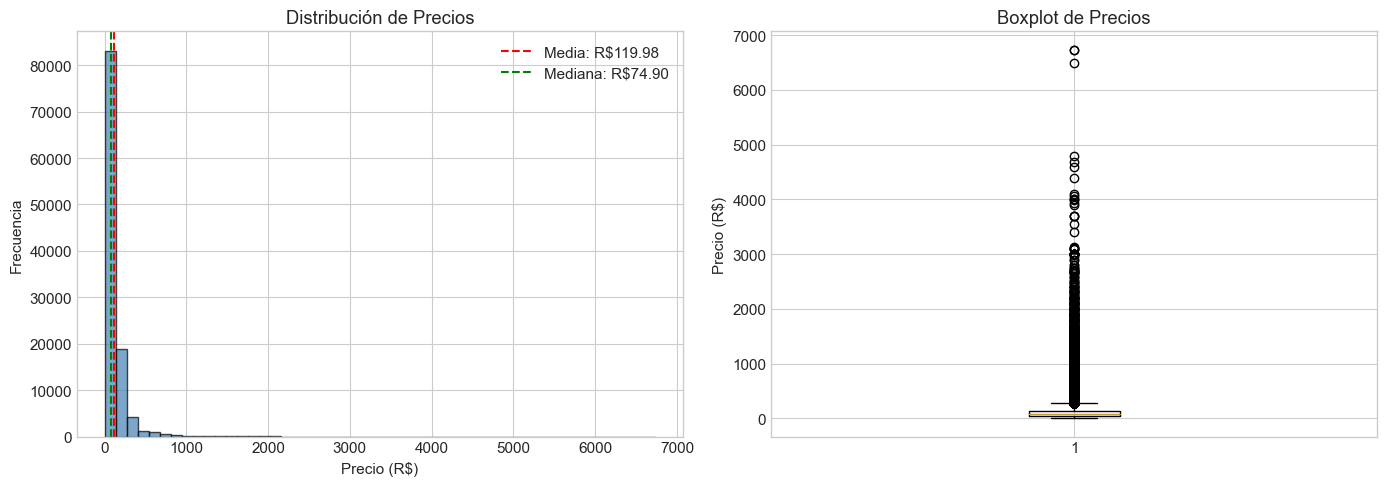


Estadísticas de precio:
   Mínimo: R$ 0.85
   Máximo: R$ 6735.00
   Media: R$ 119.98
   Mediana: R$ 74.90
   Desv. Estándar: R$ 182.30


In [103]:
print("\nANÁLISIS DE PRECIOS")
print("-"*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Precio (R$)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Precios')
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Media: R${df["price"].mean():.2f}')
axes[0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Mediana: R${df["price"].median():.2f}')
axes[0].legend()

axes[1].boxplot(df['price'], vert=True)
axes[1].set_ylabel('Precio (R$)')
axes[1].set_title('Boxplot de Precios')

plt.tight_layout()
plt.show()

print(f"\nEstadísticas de precio:")
print(f"   Mínimo: R$ {df['price'].min():.2f}")
print(f"   Máximo: R$ {df['price'].max():.2f}")
print(f"   Media: R$ {df['price'].mean():.2f}")
print(f"   Mediana: R$ {df['price'].median():.2f}")
print(f"   Desv. Estándar: R$ {df['price'].std():.2f}")


ANÁLISIS DE REVIEW SCORES
------------------------------------------------------------


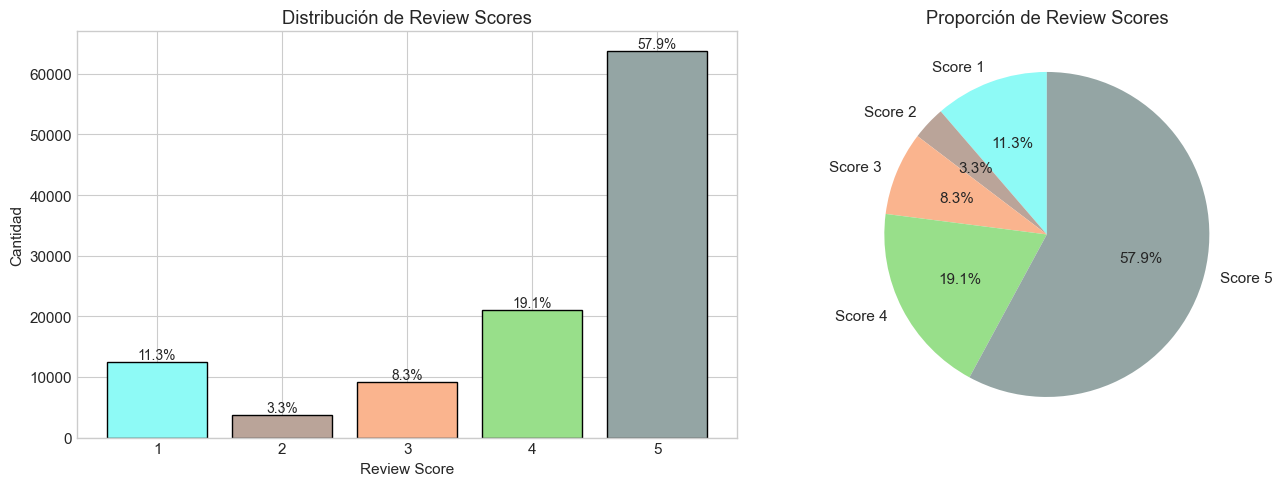


Estadísticas de review_score:
   Promedio: 4.09
   Mediana: 5
   Moda: 5

77.0% de las reviews son positivas (≥4)


In [104]:
print("\nANÁLISIS DE REVIEW SCORES")
print("-"*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

review_counts = df['review_score'].value_counts().sort_index()
colors = ['#8EFAF6', '#BAA499', '#FAB48E', '#98df8a', '#94A5A4']
axes[0].bar(review_counts.index, review_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Review Score')
axes[0].set_ylabel('Cantidad')
axes[0].set_title('Distribución de Review Scores')
axes[0].set_xticks([1, 2, 3, 4, 5])

total = len(df)
for i, (score, count) in enumerate(review_counts.items()):
    pct = count / total * 100
    axes[0].annotate(f'{pct:.1f}%', xy=(score, count), ha='center', va='bottom', fontsize=10)

axes[1].pie(review_counts.values, labels=[f'Score {int(s)}' for s in review_counts.index], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Proporción de Review Scores')

plt.tight_layout()
plt.show()

print(f"\nEstadísticas de review_score:")
print(f"   Promedio: {df['review_score'].mean():.2f}")
print(f"   Mediana: {df['review_score'].median():.0f}")
print(f"   Moda: {df['review_score'].mode()[0]:.0f}")
print(f"\n{(df['review_score'] >= 4).sum()/len(df)*100:.1f}% de las reviews son positivas (≥4)")


ANÁLISIS DE CATEGORÍAS DE PRODUCTOS
------------------------------------------------------------


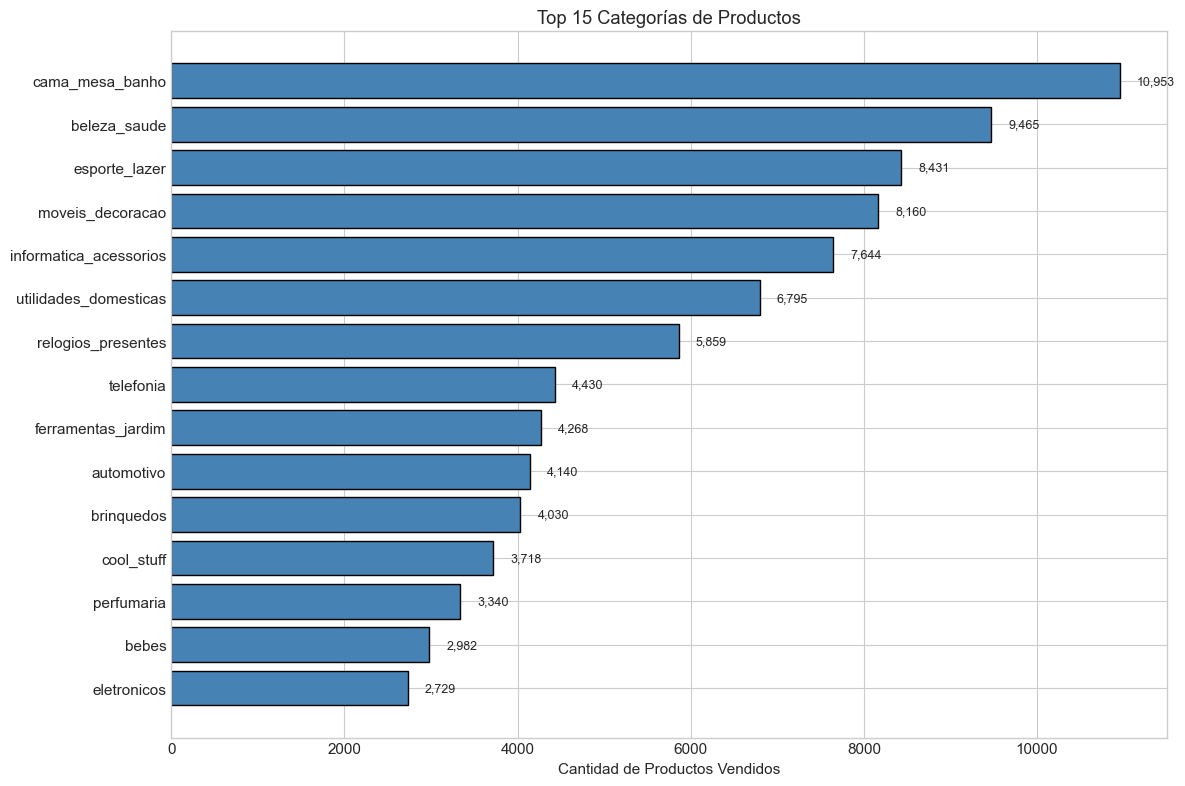


Total de categorías: 74

Top 5 categorías:
   1. cama_mesa_banho: 10,953 (9.9%)
   2. beleza_saude: 9,465 (8.6%)
   3. esporte_lazer: 8,431 (7.7%)
   4. moveis_decoracao: 8,160 (7.4%)
   5. informatica_acessorios: 7,644 (6.9%)


In [105]:
print("\nANÁLISIS DE CATEGORÍAS DE PRODUCTOS")
print("-"*60)

top_categorias = df['product_category_name'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(top_categorias.index[::-1], top_categorias.values[::-1], color='steelblue', edgecolor='black')
ax.set_xlabel('Cantidad de Productos Vendidos')
ax.set_title('Top 15 Categorías de Productos')

for bar, value in zip(bars, top_categorias.values[::-1]):
    ax.text(value + 200, bar.get_y() + bar.get_height()/2, f'{value:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nTotal de categorías: {df['product_category_name'].nunique()}")
print(f"\nTop 5 categorías:")
for i, (cat, count) in enumerate(top_categorias.head(5).items(), 1):
    pct = count / len(df) * 100
    print(f"   {i}. {cat}: {count:,} ({pct:.1f}%)")


ANÁLISIS DE MÉTODOS DE PAGO
------------------------------------------------------------


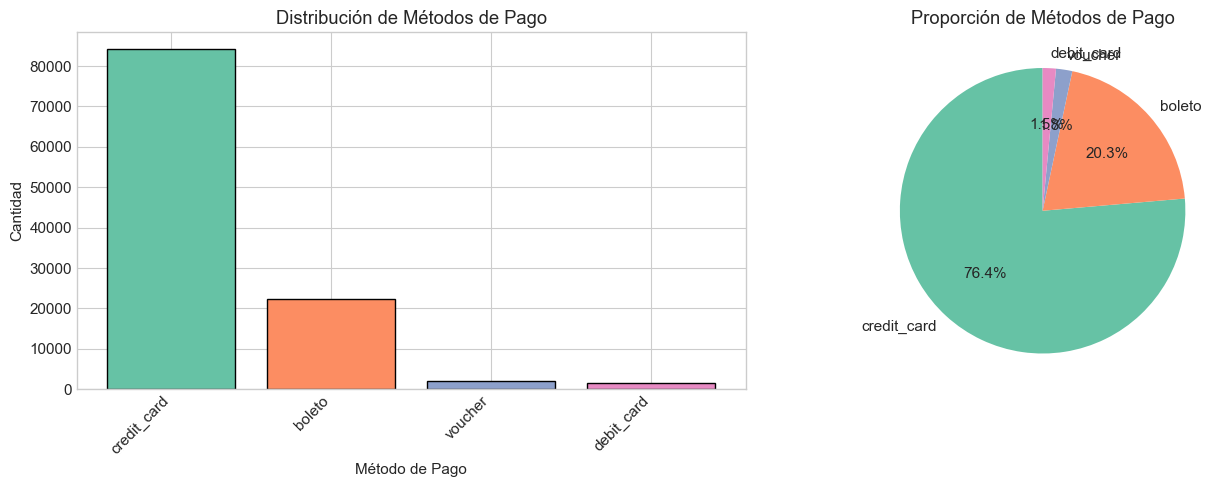


Distribución de métodos de pago:
   credit_card: 84,154 (76.4%)
   boleto: 22,362 (20.3%)
   voucher: 2,026 (1.8%)
   debit_card: 1,652 (1.5%)


In [106]:
print("\nANÁLISIS DE MÉTODOS DE PAGO")
print("-"*60)

payment_counts = df['payment_type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors_payment = sns.color_palette('Set2', len(payment_counts))
axes[0].bar(payment_counts.index, payment_counts.values, color=colors_payment, edgecolor='black')
axes[0].set_xlabel('Método de Pago')
axes[0].set_ylabel('Cantidad')
axes[0].set_title('Distribución de Métodos de Pago')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

axes[1].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', 
            colors=colors_payment, startangle=90)
axes[1].set_title('Proporción de Métodos de Pago')

plt.tight_layout()
plt.show()

print(f"\nDistribución de métodos de pago:")
for payment, count in payment_counts.items():
    pct = count / len(df) * 100
    print(f"   {payment}: {count:,} ({pct:.1f}%)")


⭐📦 REVIEW SCORE POR CATEGORÍA


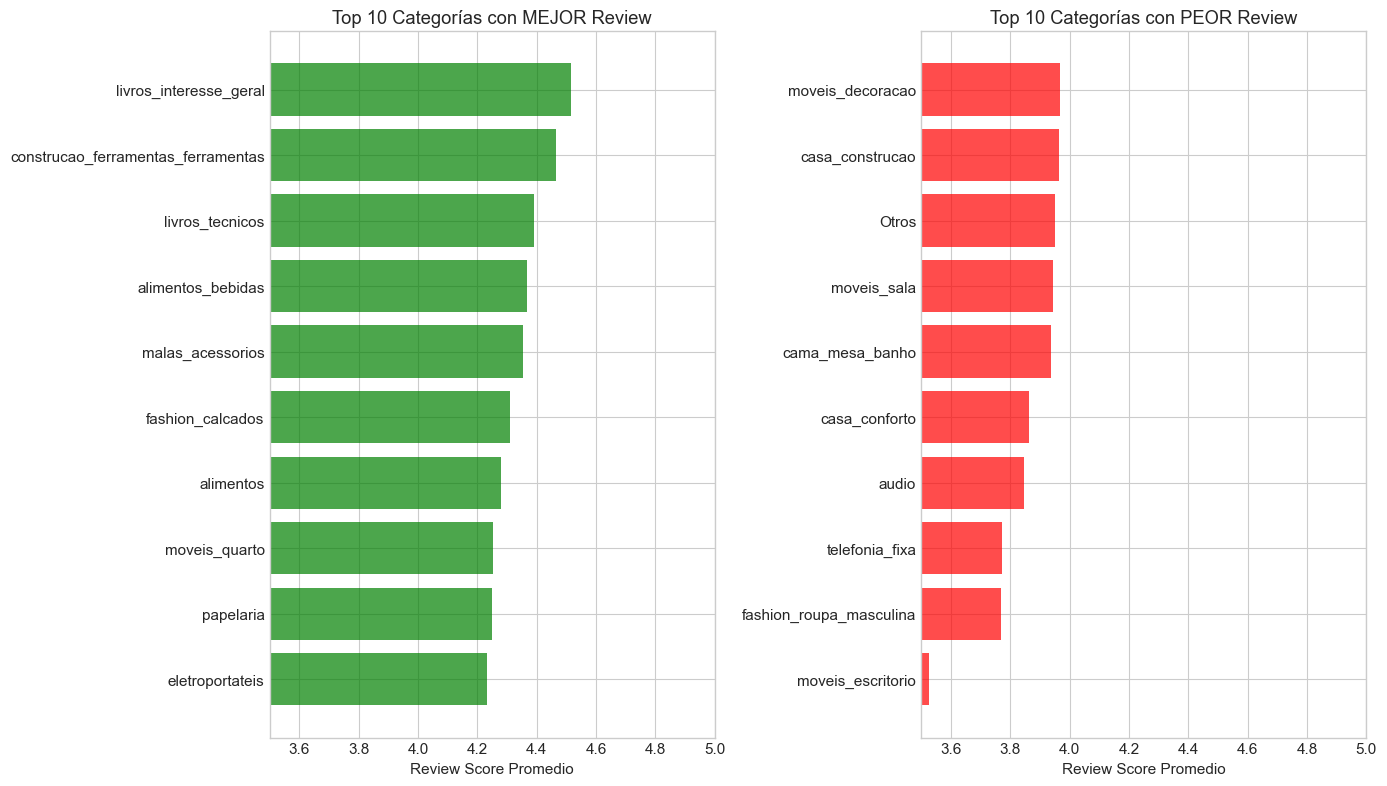


💡 Insights:
   Mejor categoría: livros_interesse_geral (4.52)
   Peor categoría: moveis_escritorio (3.53)


In [107]:
print("\n⭐📦 REVIEW SCORE POR CATEGORÍA")
print("="*60)

review_por_categoria = df.groupby('product_category_name')['review_score'].agg(['mean', 'count'])
review_por_categoria.columns = ['review_promedio', 'cantidad']
review_por_categoria = review_por_categoria[review_por_categoria['cantidad'] >= 100] #Filtro de pocos datos
review_por_categoria = review_por_categoria.sort_values('review_promedio', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

top10_mejor = review_por_categoria.head(10)
axes[0].barh(top10_mejor.index[::-1], top10_mejor['review_promedio'].values[::-1], color='green', alpha=0.7)
axes[0].set_xlabel('Review Score Promedio')
axes[0].set_title('Top 10 Categorías con MEJOR Review')
axes[0].set_xlim(3.5, 5)

top10_peor = review_por_categoria.tail(10)
axes[1].barh(top10_peor.index[::-1], top10_peor['review_promedio'].values[::-1], color='red', alpha=0.7)
axes[1].set_xlabel('Review Score Promedio')
axes[1].set_title('Top 10 Categorías con PEOR Review')
axes[1].set_xlim(3.5, 5)

plt.tight_layout()
plt.show()

print("\n💡 Insights:")
print(f"   Mejor categoría: {review_por_categoria.index[0]} ({review_por_categoria['review_promedio'].iloc[0]:.2f})")
print(f"   Peor categoría: {review_por_categoria.index[-1]} ({review_por_categoria['review_promedio'].iloc[-1]:.2f})")


PRECIO PROMEDIO POR CATEGORÍA
------------------------------------------------------------


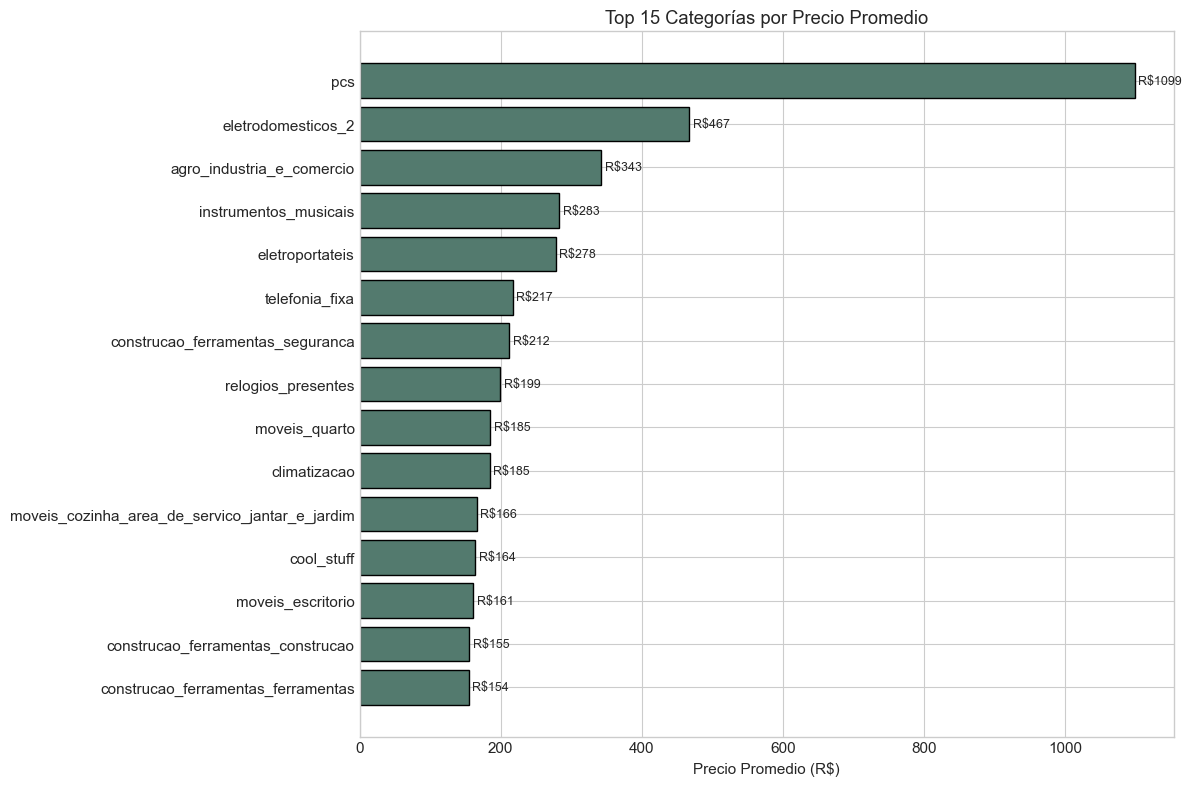

In [108]:
print("\nPRECIO PROMEDIO POR CATEGORÍA")
print("-"*60)

precio_por_categoria = df.groupby('product_category_name')['price'].agg(['mean', 'count'])
precio_por_categoria.columns = ['precio_promedio', 'cantidad']
precio_por_categoria = precio_por_categoria[precio_por_categoria['cantidad'] >= 100]
precio_por_categoria = precio_por_categoria.sort_values('precio_promedio', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
top15_precio = precio_por_categoria.head(15)
bars = ax.barh(top15_precio.index[::-1], top15_precio['precio_promedio'].values[::-1], 
               color='#537A6E', edgecolor='black')
ax.set_xlabel('Precio Promedio (R$)')
ax.set_title('Top 15 Categorías por Precio Promedio')

for bar, value in zip(bars, top15_precio['precio_promedio'].values[::-1]):
    ax.text(value + 5, bar.get_y() + bar.get_height()/2, f'R${value:.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


 REVIEW SCORE POR MÉTODO DE PAGO
------------------------------------------------------------


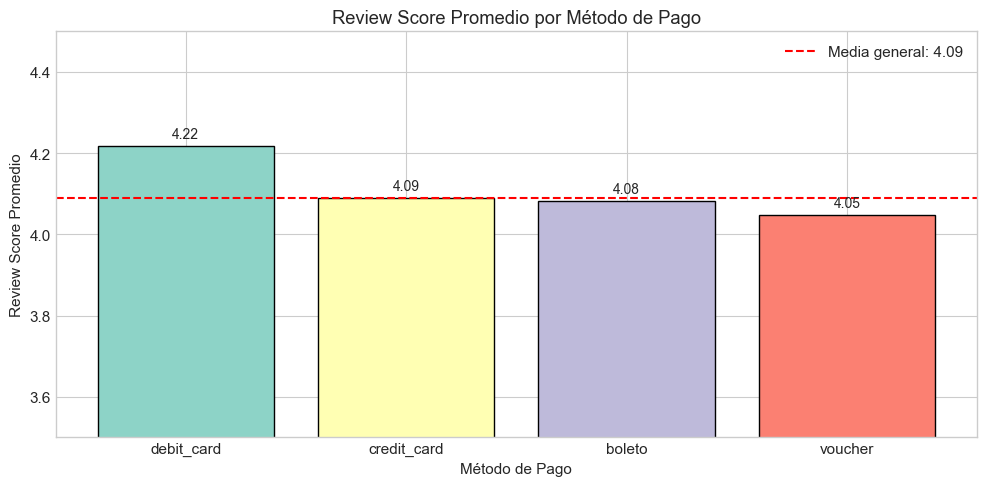

In [109]:
print("\n REVIEW SCORE POR MÉTODO DE PAGO")
print("-"*60)

review_por_pago = df.groupby('payment_type')['review_score'].agg(['mean', 'count'])
review_por_pago.columns = ['review_promedio', 'cantidad']
review_por_pago = review_por_pago.sort_values('review_promedio', ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(review_por_pago.index, review_por_pago['review_promedio'], 
              color=sns.color_palette('Set3', len(review_por_pago)), edgecolor='black')
ax.set_xlabel('Método de Pago')
ax.set_ylabel('Review Score Promedio')
ax.set_title('Review Score Promedio por Método de Pago')
ax.set_ylim(3.5, 4.5)
ax.axhline(df['review_score'].mean(), color='red', linestyle='--', label=f'Media general: {df["review_score"].mean():.2f}')
ax.legend()

for bar, value in zip(bars, review_por_pago['review_promedio']):
    ax.text(bar.get_x() + bar.get_width()/2, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [110]:
print("\n📅 ANÁLISIS TEMPORAL")
print("="*60)

df['order_date'] = pd.to_datetime(df['order_purchase_datetime'], format='%d-%m-%Y')
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day_of_week'] = df['order_date'].dt.dayofweek
df['day_name'] = df['order_date'].dt.day_name()

print("✅ Variables temporales creadas")
print(f"   Período: {df['order_date'].min().strftime('%Y-%m-%d')} a {df['order_date'].max().strftime('%Y-%m-%d')}")


📅 ANÁLISIS TEMPORAL
✅ Variables temporales creadas
   Período: 2016-09-15 a 2018-08-29


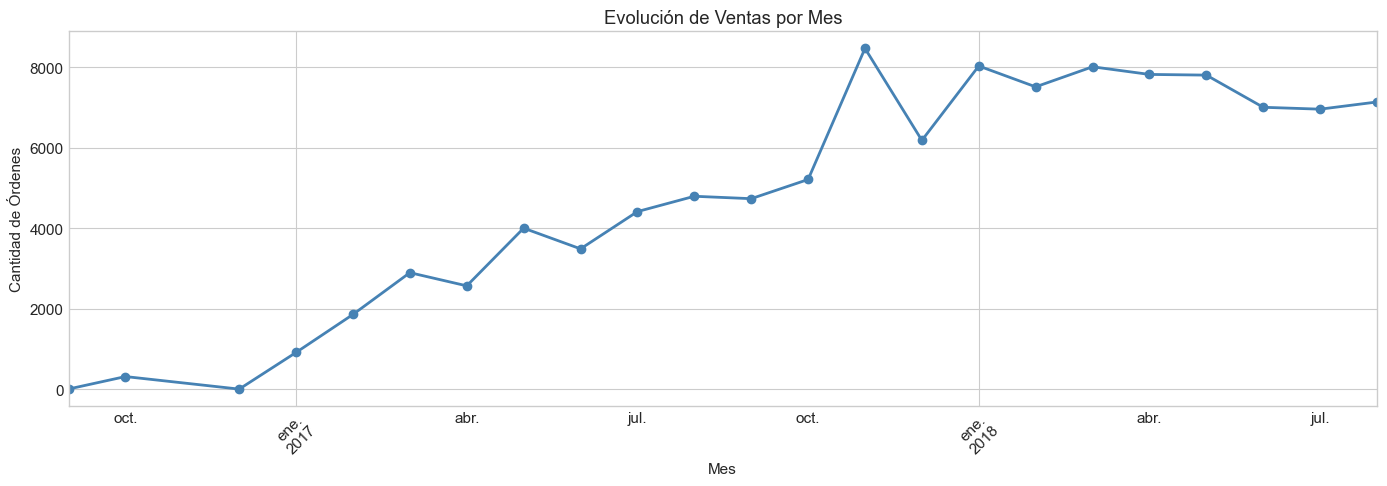


📊 Mes con más ventas: 2017-11 (8,475 órdenes)
📊 Mes con menos ventas: 2016-12 (1 órdenes)


In [111]:
ventas_mes = df.groupby(df['order_date'].dt.to_period('M')).size()

fig, ax = plt.subplots(figsize=(14, 5))
ventas_mes.plot(kind='line', marker='o', ax=ax, color='steelblue', linewidth=2)
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Órdenes')
ax.set_title('Evolución de Ventas por Mes')
ax.fill_between(range(len(ventas_mes)), ventas_mes.values, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n📊 Mes con más ventas: {ventas_mes.idxmax()} ({ventas_mes.max():,} órdenes)")
print(f"📊 Mes con menos ventas: {ventas_mes.idxmin()} ({ventas_mes.min():,} órdenes)")

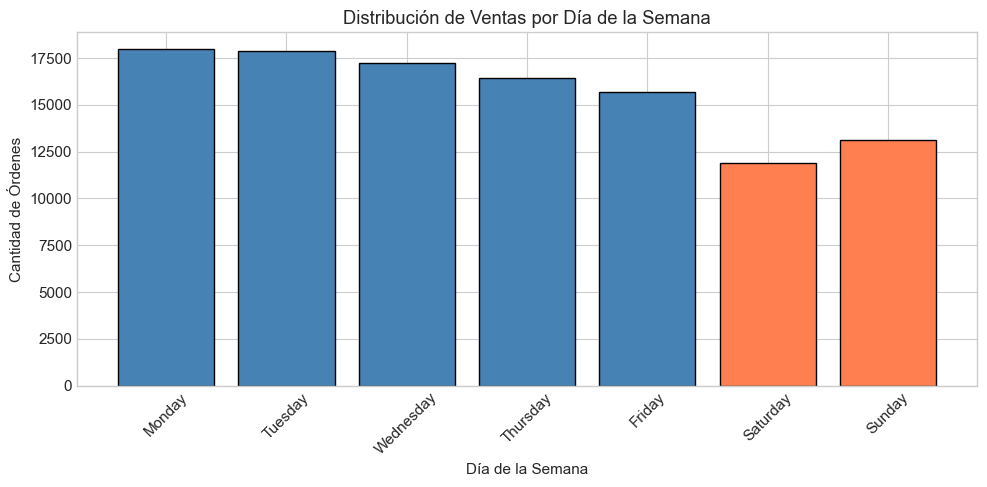


💡 Día con más ventas: Monday (17,973)
💡 Día con menos ventas: Saturday (11,885)


In [112]:
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_dia = df['day_name'].value_counts().reindex(dias_orden)

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['steelblue' if d not in ['Saturday', 'Sunday'] else 'coral' for d in dias_orden]
ax.bar(ventas_dia.index, ventas_dia.values, color=colors, edgecolor='black')
ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Cantidad de Órdenes')
ax.set_title('Distribución de Ventas por Día de la Semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n💡 Día con más ventas: {ventas_dia.idxmax()} ({ventas_dia.max():,})")
print(f"💡 Día con menos ventas: {ventas_dia.idxmin()} ({ventas_dia.min():,})")


ANÁLISIS GEOGRÁFICO
------------------------------------------------------------


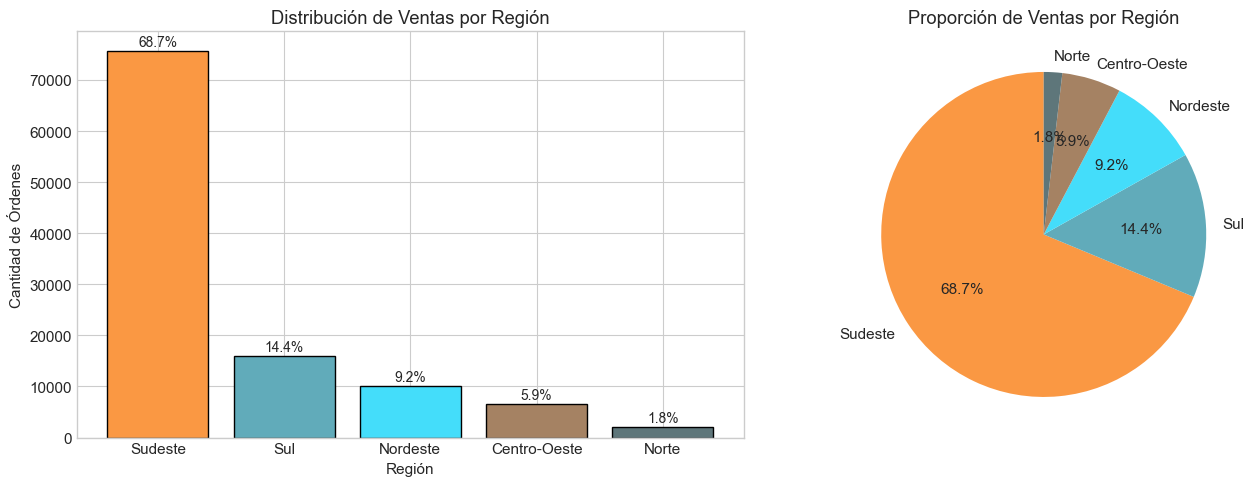


Distribución por región:
   Sudeste: 75,732 (68.7%)
   Sul: 15,880 (14.4%)
   Nordeste: 10,087 (9.2%)
   Centro-Oeste: 6,480 (5.9%)
   Norte: 2,018 (1.8%)


In [113]:
print("\nANÁLISIS GEOGRÁFICO")
print("-"*60)

ventas_region = df['customer_region'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors_region = ['#FA9843', '#61ABBA', '#44DDFA', '#A58263', '#5E767A']
axes[0].bar(ventas_region.index, ventas_region.values, color=colors_region, edgecolor='black')
axes[0].set_xlabel('Región')
axes[0].set_ylabel('Cantidad de Órdenes')
axes[0].set_title('Distribución de Ventas por Región')

for i, (region, count) in enumerate(ventas_region.items()):
    pct = count / len(df) * 100
    axes[0].text(i, count + 1000, f'{pct:.1f}%', ha='center', fontsize=10)

axes[1].pie(ventas_region.values, labels=ventas_region.index, autopct='%1.1f%%', 
            colors=colors_region, startangle=90)
axes[1].set_title('Proporción de Ventas por Región')

plt.tight_layout()
plt.show()

print(f"\nDistribución por región:")
for region, count in ventas_region.items():
    pct = count / len(df) * 100
    print(f"   {region}: {count:,} ({pct:.1f}%)")


REVIEW SCORE POR REGIÓN
------------------------------------------------------------


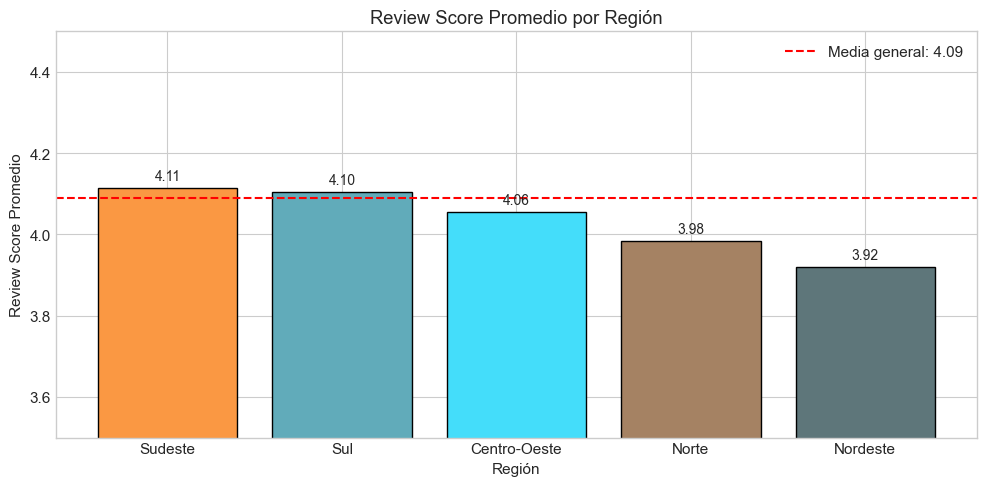

In [114]:
print("\nREVIEW SCORE POR REGIÓN")
print("-"*60)

review_region = df.groupby('customer_region')['review_score'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(review_region.index, review_region.values, color=colors_region, edgecolor='black')
ax.set_xlabel('Región')
ax.set_ylabel('Review Score Promedio')
ax.set_title('Review Score Promedio por Región')
ax.set_ylim(3.5, 4.5)
ax.axhline(df['review_score'].mean(), color='red', linestyle='--', label=f'Media general: {df["review_score"].mean():.2f}')
ax.legend()

for bar, value in zip(bars, review_region.values):
    ax.text(bar.get_x() + bar.get_width()/2, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


TOP 10 ESTADOS POR VENTAS
------------------------------------------------------------


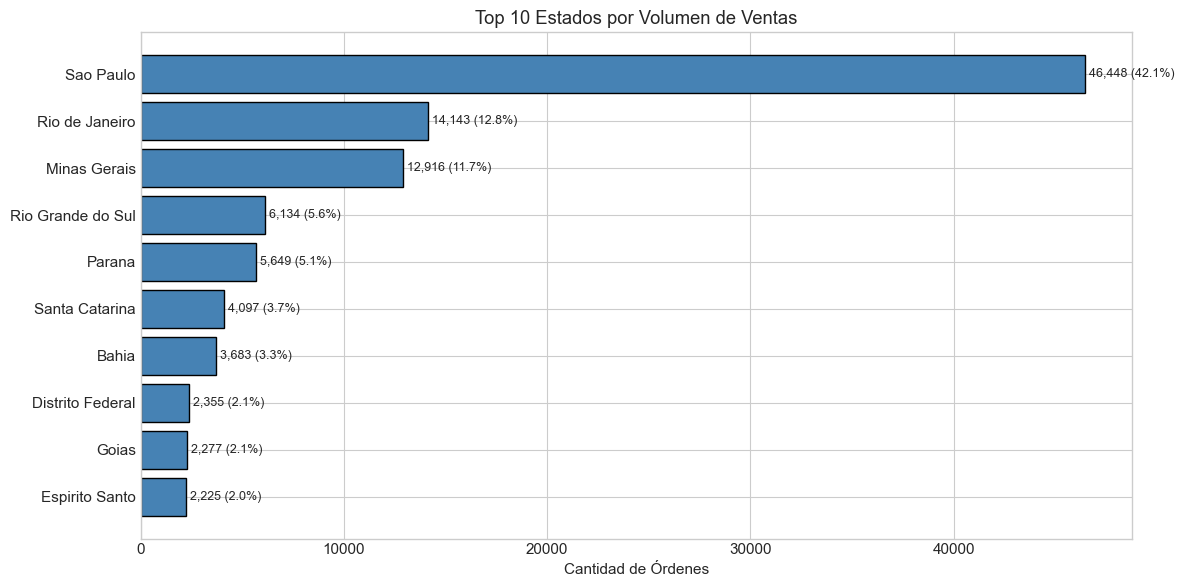


Los 3 estados principales concentran el 66.7% del negocio


In [115]:
print("\nTOP 10 ESTADOS POR VENTAS")
print("-"*60)

ventas_estado = df['customer_state'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(ventas_estado.index[::-1], ventas_estado.values[::-1], color='steelblue', edgecolor='black')
ax.set_xlabel('Cantidad de Órdenes')
ax.set_title('Top 10 Estados por Volumen de Ventas')

for bar, value in zip(bars, ventas_estado.values[::-1]):
    pct = value / len(df) * 100
    ax.text(value + 200, bar.get_y() + bar.get_height()/2, f'{value:,} ({pct:.1f}%)', va='center', fontsize=9)

plt.tight_layout()
plt.show()

top3_pct = ventas_estado.head(3).sum() / len(df) * 100
print(f"\nLos 3 estados principales concentran el {top3_pct:.1f}% del negocio")

In [116]:
print("\n ANÁLISIS DE PATRONES DE COMPRA")
print("="*60)

productos_por_cliente = df.groupby('customer_unique_id')['product_category_name'].apply(list)

clientes_recurrentes = productos_por_cliente[productos_por_cliente.apply(len) > 1]

print(f"Total de clientes: {df['customer_unique_id'].nunique():,}")
print(f"Clientes con más de 1 compra: {len(clientes_recurrentes):,}")
print(f"Tasa de recompra: {len(clientes_recurrentes) / df['customer_unique_id'].nunique() * 100:.2f}%")


 ANÁLISIS DE PATRONES DE COMPRA
Total de clientes: 93,358
Clientes con más de 1 compra: 11,610
Tasa de recompra: 12.44%


In [117]:
print("\n CATEGORÍAS POPULARES POR REGIÓN")
print("="*60)

for region in df['customer_region'].unique():
    top_cat = df[df['customer_region'] == region]['product_category_name'].value_counts().head(3)
    print(f"\n{region}:")
    for i, (cat, count) in enumerate(top_cat.items(), 1):
        print(f"   {i}. {cat} ({count:,})")


 CATEGORÍAS POPULARES POR REGIÓN

Sudeste:
   1. cama_mesa_banho (8,307)
   2. beleza_saude (6,380)
   3. esporte_lazer (5,709)

Nordeste:
   1. beleza_saude (1,109)
   2. relogios_presentes (766)
   3. esporte_lazer (733)

Centro-Oeste:
   1. beleza_saude (622)
   2. cama_mesa_banho (571)
   3. esporte_lazer (528)

Sul:
   1. moveis_decoracao (1,418)
   2. cama_mesa_banho (1,400)
   3. esporte_lazer (1,300)

Norte:
   1. beleza_saude (209)
   2. informatica_acessorios (165)
   3. esporte_lazer (161)


In [118]:
print("\n" + "="*70)
print("📊 RESUMEN DE INSIGHTS PARA EL SISTEMA DE RECOMENDACIÓN")
print("="*70)

print("\n PATRONES DE COMPRA:")
print(f"   • {df['product_category_name'].nunique()} categorías de productos")
print(f"   • Categoría más popular: {df['product_category_name'].value_counts().index[0]}")
print(f"   • Tasa de recompra: {len(clientes_recurrentes) / df['customer_unique_id'].nunique() * 100:.2f}%")

print("\n SATISFACCIÓN:")
print(f"   • Review promedio: {df['review_score'].mean():.2f}/5")
print(f"   • {(df['review_score'] >= 4).sum()/len(df)*100:.1f}% de reviews positivas")
print(f"   • Correlación precio-satisfacción: {correlacion:.3f} (débil)")

print("\n GEOGRAFÍA:")
print(f"   • Región dominante: Sudeste ({(df['customer_region'] == 'Sudeste').sum()/len(df)*100:.1f}%)")
print(f"   • Estado líder: {df['customer_state'].value_counts().index[0]}")

print("\n TEMPORALIDAD:")
print(f"   • Período de datos: {df['order_date'].min().strftime('%Y-%m')} a {df['order_date'].max().strftime('%Y-%m')}")
print(f"   • Día más activo: {ventas_dia.idxmax()}")

print("\n PAGOS:")
print(f"   • Método preferido: {df['payment_type'].value_counts().index[0]} ({df['payment_type'].value_counts().iloc[0]/len(df)*100:.1f}%)")


📊 RESUMEN DE INSIGHTS PARA EL SISTEMA DE RECOMENDACIÓN

 PATRONES DE COMPRA:
   • 74 categorías de productos
   • Categoría más popular: cama_mesa_banho
   • Tasa de recompra: 12.44%

 SATISFACCIÓN:
   • Review promedio: 4.09/5
   • 77.0% de reviews positivas
   • Correlación precio-satisfacción: 0.003 (débil)

 GEOGRAFÍA:
   • Región dominante: Sudeste (68.7%)
   • Estado líder: Sao Paulo

 TEMPORALIDAD:
   • Período de datos: 2016-09 a 2018-08
   • Día más activo: Monday

 PAGOS:
   • Método preferido: credit_card (76.4%)


In [119]:
columnas_modelo = [
    'order_number',
    'order_id',
    'product_id',
    'price',
    'product_category_name',
    'order_purchase_datetime',
    'customer_unique_id',
    'customer_state',
    'customer_region',
    'review_score',
    'payment_type'
]

df_final = df[columnas_modelo].copy()

print("DATASET FINAL PARA MODELO")
print("="*60)
print(f"Dimensiones: {df_final.shape[0]:,} filas × {df_final.shape[1]} columnas")
print(f"\nColumnas:")
for i, col in enumerate(df_final.columns, 1):
    print(f"   {i:2d}. {col}")

DATASET FINAL PARA MODELO
Dimensiones: 110,197 filas × 11 columnas

Columnas:
    1. order_number
    2. order_id
    3. product_id
    4. price
    5. product_category_name
    6. order_purchase_datetime
    7. customer_unique_id
    8. customer_state
    9. customer_region
   10. review_score
   11. payment_type


In [120]:
output_file = 'olist_clean_for_model.csv'
df_final.to_csv(output_file, index=False)